# Importing Libraries and Datasets

In [1]:
!pip install pytorch-lightning

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 55.4 MB/s eta 0:00:00


In [2]:
import os
import h5py
import torch
import gdown
import shutil
import tarfile
import zipfile
import numpy as np
from PIL import Image
import torch.nn as nn
from torch import Tensor
import torch.optim as optim
from google.colab import drive
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torchvision.utils as vutils
from torch.autograd import Function,Variable
from torch.utils.data import random_split
from sklearn.metrics import accuracy_score
from torchvision.transforms import ToTensor
from torchvision.datasets import ImageFolder
from torchvision.utils import save_image
from torch.utils.data import Dataset, DataLoader
from pytorch_lightning import LightningDataModule
from torchvision import datasets, transforms, models
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import euclidean_distances

## Disentanglement datasets

### CelebA dataset

In [ ]:
# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Step 2: Copy the ZIP file from Google Drive to /content folder
zip_path = '/content/drive/My Drive/CelebA/Img/img_align_celeba.zip'
destination_path = '/content/img_align_celeba.zip'

# Ensure the source file exists and copy it
if os.path.exists(zip_path):
    shutil.copy(zip_path, destination_path)
    print("File copied successfully.")
else:
    print("File not found at the specified path.")

# Step 3: Unzip the file to /content folder
with zipfile.ZipFile(destination_path, 'r') as zip_ref:
    zip_ref.extractall('/content/')
print("ZIP file extracted.")


# Step 2: Define paths to the files you want to copy
files_to_copy = [
    '/content/drive/My Drive/CelebA/Anno/list_attr_celeba.txt',
    '/content/drive/My Drive/CelebA/Anno/list_landmarks_celeba.txt',
    '/content/drive/My Drive/CelebA/Anno/list_landmarks_align_celeba.txt',
    '/content/drive/My Drive/CelebA/Anno/list_bbox_celeba.txt',
    '/content/drive/My Drive/CelebA/Anno/identity_CelebA.txt',
    '/content/drive/My Drive/CelebA/Eval/list_eval_partition.txt'
]

# Step 3: Copy the files to the /content directory
for file_path in files_to_copy:
    if os.path.exists(file_path):
        shutil.copy(file_path, '/content')
        print(f"Copied {file_path} to /content.")
    else:
        print(f"????????????????????File {file_path} not found!")

????????????????????File /content/drive/My Drive/CelebA/Anno/list_attr_celeba.txt not found!
????????????????????File /content/drive/My Drive/CelebA/Anno/list_landmarks_celeba.txt not found!
Copied /content/drive/My Drive/CelebA/Anno/list_landmarks_align_celeba.txt to /content.
????????????????????File /content/drive/My Drive/CelebA/Anno/list_bbox_celeba.txt not found!
????????????????????File /content/drive/My Drive/CelebA/Anno/identity_CelebA.txt not found!
Copied /content/drive/My Drive/CelebA/Eval/list_eval_partition.txt to /content.
Files in /content:


In [ ]:
len(os.listdir('/content/img_align_celeba')) , os.listdir('/content')

(202599,
 ['.config',
  'list_bbox_celeba.txt',
  'drive',
  'data',
  'list_attr_celeba.txt',
  'img_align_celeba.zip',
  'img_align_celeba',
  'list_eval_partition.txt',
  'list_landmarks_celeba.txt',
  'list_landmarks_align_celeba.txt',
  'identity_CelebA.txt',
  'celeba',
  'sample_data'])

In [ ]:
import os
import shutil

# Create the 'daata' folder if it doesn't exist
new_folder = '/content/daata'
os.makedirs(new_folder, exist_ok=True)

# List of files to move to the new folder
files_to_move = [
    '/content/list_attr_celeba.txt',
    '/content/list_landmarks_celeba.txt',
    '/content/list_landmarks_align_celeba.txt',
    '/content/list_bbox_celeba.txt',
    '/content/identity_CelebA.txt',
    '/content/list_eval_partition.txt',
    '/content/img_align_celeba.zip',
    '/content/img_align_celeba'
]

# Move each file/folder to the new directory
for file_path in files_to_move:
    if os.path.exists(file_path):
        # If it's a file, move it
        if os.path.isfile(file_path):
            shutil.move(file_path, os.path.join(new_folder, os.path.basename(file_path)))
            print(f"Moved file: {file_path}")
        # If it's a folder, move the folder
        elif os.path.isdir(file_path):
            shutil.move(file_path, os.path.join(new_folder, os.path.basename(file_path)))
            print(f"Moved folder: {file_path}")
    else:
        print(f"File or folder not found: {file_path}")

# Verify the contents of the new folder
print("Contents of /content/daata:")
print(os.listdir(new_folder))


Moved file: /content/list_attr_celeba.txt
Moved file: /content/list_landmarks_celeba.txt
Moved file: /content/list_landmarks_align_celeba.txt
Moved file: /content/list_bbox_celeba.txt
Moved file: /content/identity_CelebA.txt
Moved file: /content/list_eval_partition.txt
Moved file: /content/img_align_celeba.zip
Moved folder: /content/img_align_celeba
Contents of /content/daata:
['list_bbox_celeba.txt', 'list_attr_celeba.txt', 'img_align_celeba.zip', 'img_align_celeba', 'list_eval_partition.txt', 'list_landmarks_celeba.txt', 'list_landmarks_align_celeba.txt', 'identity_CelebA.txt']


In [ ]:
transform = transforms.Compose([
    # transforms.Resize((128, 128)),  # Resize images
    transforms.ToTensor(),          # Convert images to tensor
])

dataset = datasets.CelebA(root='/content/daata', download=False, transform=transform)


# Access a sample image
image, label = dataset[0]  # Index 0 will fetch the first image and label

# Convert tensor to numpy array for plotting
image = image.numpy().transpose((1, 2, 0))

# Display the image
plt.imshow(image)
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axes
plt.show()


RuntimeError: Dataset not found or corrupted. You can use download=True to download it

### 3d chair dataset

In [ ]:
url = 'https://www.di.ens.fr/willow/research/seeing3Dchairs/data/rendered_chairs.tar'
out = '3dchairs.tar'
gdown.download(url, out, quiet=False)

Downloading...
From: https://www.di.ens.fr/willow/research/seeing3Dchairs/data/rendered_chairs.tar
To: /content/3dchairs.tar
2.41GB [01:42, 23.4MB/s]


'3dchairs.tar'

In [ ]:
# Extract the tar file
import tarfile
tar_path = '/content/3dchairs.tar'
extract_path = '/content/3dchairs'

try:
    with tarfile.open(tar_path, 'r') as tar:
        tar.extractall(path=extract_path)
    print(f"Extraction completed. Files extracted to: {extract_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Extraction completed. Files extracted to: /content/3dchairs


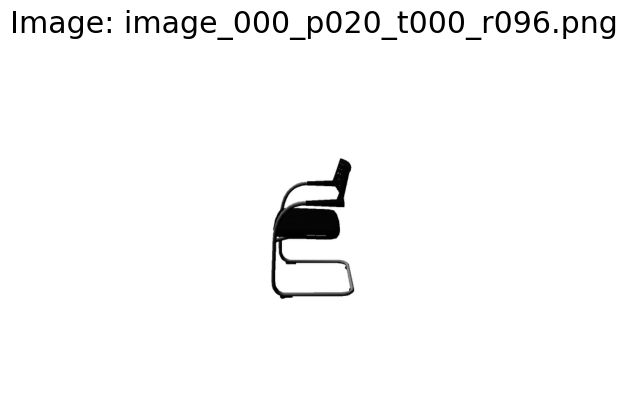

In [ ]:
root_path = '/content/3dchairs/rendered_chairs'

# List all folders in the directory
folders = sorted([f for f in os.listdir(root_path) if os.path.isdir(os.path.join(root_path, f))])

# Check if folders exist
if folders:
    first_folder = folders[0]
    render_folder_path = os.path.join(root_path, first_folder, 'renders')

    # List all .png files in the render folder
    png_files = sorted([f for f in os.listdir(render_folder_path) if f.endswith('.png')])

    if png_files:
        first_image_path = os.path.join(render_folder_path, png_files[0])

        # Load and display the image
        img = Image.open(first_image_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image: {png_files[0]}")
        plt.show()
    else:
        print(f"No .png files found in the render folder: {render_folder_path}")
else:
    print(f"No folders found in the directory: {root_path}")

### Sprites dataset

In [13]:
url = 'https://github.com/google-deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
out = 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
gdown.download(url, out, quiet=False)

url = 'https://github.com/google-deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz'
out = 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64_1.npz'  #hdf5 file??
gdown.download(url, out, quiet=False)

Downloading...
From: https://github.com/google-deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz
To: /content/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz
168kB [00:00, 80.3MB/s]
Downloading...
From: https://github.com/google-deepmind/dsprites-dataset/blob/master/dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz
To: /content/dsprites_ndarray_co1sh3sc6or40x32y32_64x64_1.npz
168kB [00:00, 117MB/s]


'dsprites_ndarray_co1sh3sc6or40x32y32_64x64_1.npz'

In [7]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

# Change figure aesthetics
%matplotlib inline
sns.set_context('talk', font_scale=1.2, rc={'lines.linewidth': 1.5})

In [8]:
# Load dataset
dataset_zip = np.load('dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz', allow_pickle=True, encoding='latin1')

print('Keys in the dataset:', dataset_zip.keys())
imgs = dataset_zip['imgs']
latents_values = dataset_zip['latents_values']
latents_classes = dataset_zip['latents_classes']
metadata = dataset_zip['metadata'][()]

print('Metadata: \n', metadata)

Keys in the dataset: KeysView(NpzFile 'dsprites_ndarray_co1sh3sc6or40x32y32_64x64.npz' with keys: metadata, imgs, latents_classes, latents_values)
Metadata: 
 {'date': 'April 2017', 'description': 'Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.', 'version': 1, 'latents_names': ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'), 'latents_possible_values': {'orientation': array([0.        , 0.16110732, 0.32221463, 0.48332195, 0.64442926,
       0.80553658, 0.96664389, 1.12775121, 1.28885852, 1.44996584,
       1.61107316, 1.77218047, 1.93328779, 2.0943951 , 2.25550242,
       2.41660973, 2.577717

In [87]:
metadata['description'] , metadata['latents_names'], metadata['latents_sizes']

('Disentanglement test Sprites dataset.Procedurally generated 2D shapes, from 6 disentangled latent factors.This dataset uses 6 latents, controlling the color, shape, scale, rotation and position of a sprite. All possible variations of the latents are present. Ordering along dimension 1 is fixed and can be mapped back to the exact latent values that generated that image.We made sure that the pixel outputs are different. No noise added.',
 ('color', 'shape', 'scale', 'orientation', 'posX', 'posY'),
 array([ 1,  3,  6, 40, 32, 32]))

In [91]:
for z in metadata['latents_names']:
  print(z, metadata['latents_possible_values'][z])

color [1.]
shape [1. 2. 3.]
scale [0.5 0.6 0.7 0.8 0.9 1. ]
orientation [0.         0.16110732 0.32221463 0.48332195 0.64442926 0.80553658
 0.96664389 1.12775121 1.28885852 1.44996584 1.61107316 1.77218047
 1.93328779 2.0943951  2.25550242 2.41660973 2.57771705 2.73882436
 2.89993168 3.061039   3.22214631 3.38325363 3.54436094 3.70546826
 3.86657557 4.02768289 4.1887902  4.34989752 4.51100484 4.67211215
 4.83321947 4.99432678 5.1554341  5.31654141 5.47764873 5.63875604
 5.79986336 5.96097068 6.12207799 6.28318531]
posX [0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 0.32258065 0.35483871
 0.38709677 0.41935484 0.4516129  0.48387097 0.51612903 0.5483871
 0.58064516 0.61290323 0.64516129 0.67741935 0.70967742 0.74193548
 0.77419355 0.80645161 0.83870968 0.87096774 0.90322581 0.93548387
 0.96774194 1.        ]
posY [0.         0.03225806 0.06451613 0.09677419 0.12903226 0.16129032
 0.19354839 0.22580645 0.25806452 0.29032258 

In [9]:
# Define number of values per latents and functions to convert to indices
latents_sizes = metadata['latents_sizes']
latents_bases = np.concatenate((latents_sizes[::-1].cumprod()[::-1][1:], np.array([1,])))

def latent_to_index(latents):
  return np.dot(latents, latents_bases).astype(int)


def sample_latent(size=1):
  samples = np.zeros((size, latents_sizes.size))
  for lat_i, lat_size in enumerate(latents_sizes):
    samples[:, lat_i] = np.random.randint(lat_size, size=size)

  return samples

# Helper function to show images
def show_images_grid(imgs_, num_images=25):
  ncols = int(np.ceil(num_images**0.5))
  nrows = int(np.ceil(num_images / ncols))
  _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
  axes = axes.flatten()

  for ax_i, ax in enumerate(axes):
    if ax_i < num_images:
      ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
      ax.set_xticks([])
      ax.set_yticks([])
    else:
      ax.axis('off')

def show_density(imgs):
  _, ax = plt.subplots()
  ax.imshow(imgs.mean(axis=0), interpolation='nearest', cmap='Greys_r')
  ax.grid('off')
  ax.set_xticks([])
  ax.set_yticks([])

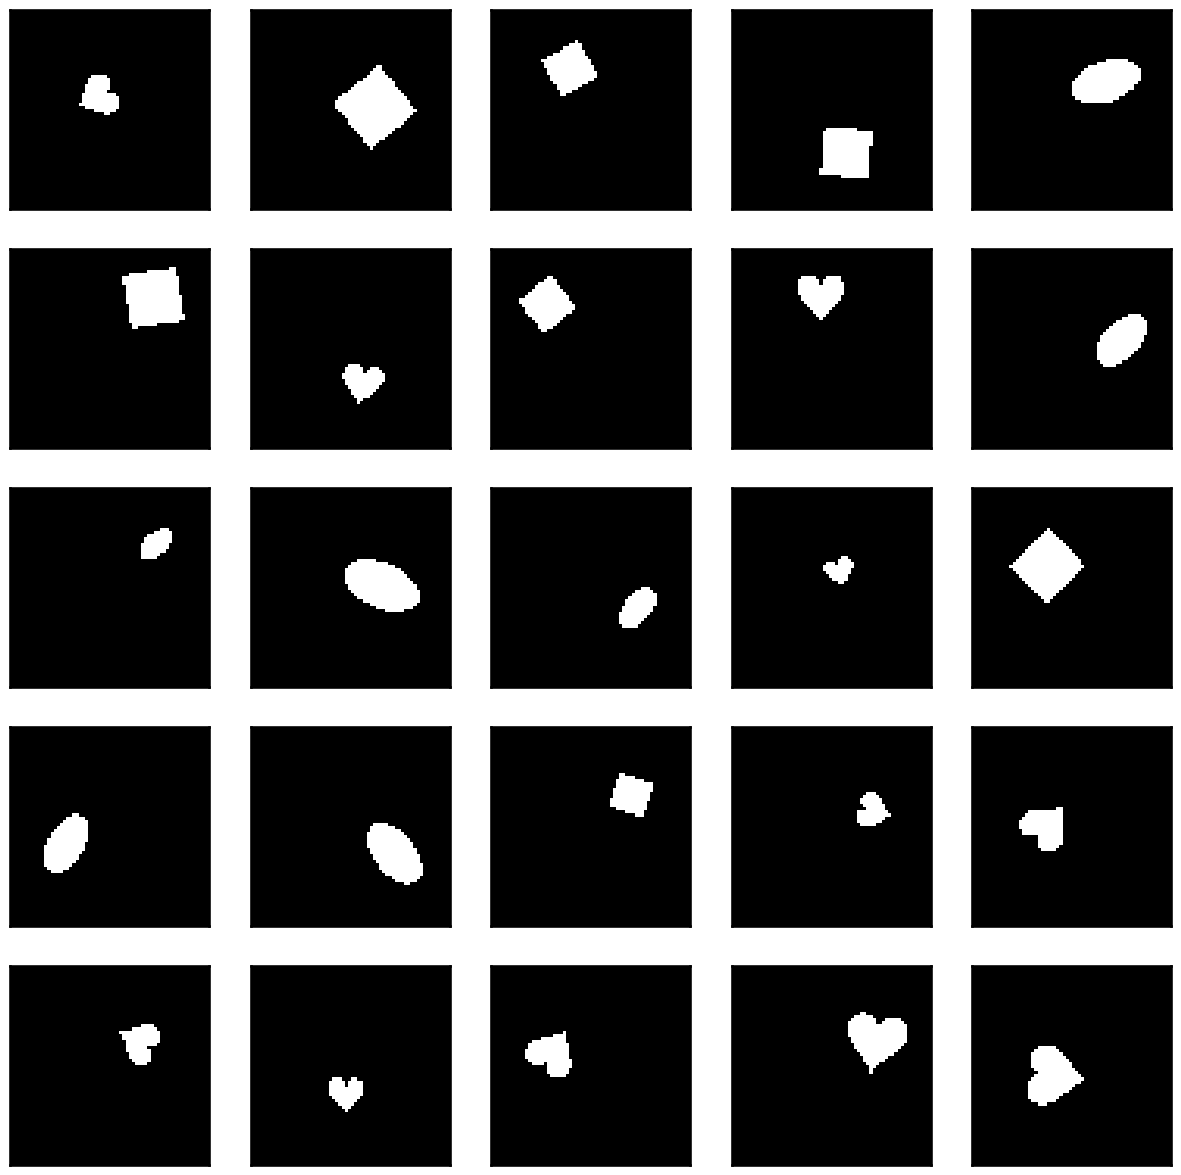

In [10]:
# Sample latents randomly
latents_sampled = sample_latent(size=5000)

# Select images
indices_sampled = latent_to_index(latents_sampled)
imgs_sampled = imgs[indices_sampled]

# Show images
show_images_grid(imgs_sampled)

In [143]:
type(imgs_sampled[0]), imgs_sampled[0].shape, imgs_sampled.shape

(numpy.ndarray, (64, 64), (5000, 64, 64))

In [41]:
# # Splitting the dataset
# train_imgs, val_imgs, train_latents, val_latents = train_test_split(
#     imgs_sampled,
#     latents_sampled,
#     test_size=0.2,
#     random_state=42
# )

# # Creating the train and validation sets
# sprites_train_set = {"imgs": train_imgs, "latents": train_latents}
# sprites_val_set = {"imgs": val_imgs, "latents": val_latents}

# # Verify the splits
# print(f"Training set size: {len(sprites_train_set['imgs'])}")
# print(f"Validation set size: {len(sprites_val_set['imgs'])}")
# print("Shape of (all) imgs and latents",imgs_sampled.shape, latents_sampled.shape)

In [11]:
from sklearn.model_selection import train_test_split

# Assuming train_imgs, val_imgs, train_latents, val_latents are defined from your previous code

class SpritesDataset(Dataset):
    def __init__(self, data_dict, tfms):
        self.imgs = data_dict['imgs'].astype('float32') / 255.0  # Normalize to [0, 1] range
        self.latents = data_dict['latents']
        self.transform = tfms

    def __len__(self):
        return len(self.imgs)

    def __getitem__(self, idx):
        img = self.imgs[idx]
        latents = self.latents[idx]

        if self.transform:
            img = self.transform(img)

        # print(img.shape) [1,64,64]
        return img, latents

        # return  img.transpose(2, 0, 1), latents


# Splitting the dataset
train_imgs, val_imgs, train_latents, val_latents = train_test_split(
    imgs_sampled,
    latents_sampled,
    test_size=0.2,
    random_state=42
)

tfms = transforms.Compose([
    transforms.ToTensor(),  # Convert image to tensor
])
# Creating the train and validation datasets
sprites_train_set = SpritesDataset({"imgs": train_imgs, "latents": train_latents}, tfms)
sprites_val_set = SpritesDataset({"imgs": val_imgs, "latents": val_latents}, tfms)

# Verify the splits
print(f"Training set size: {len(sprites_train_set)}")
print(f"Validation set size: {len(sprites_val_set)}")
print("Shape of (all) imgs and latents", imgs_sampled.shape, latents_sampled.shape)

test_dataloader = DataLoader(sprites_val_set, batch_size=64, shuffle=False, num_workers=4)

Training set size: 4000
Validation set size: 1000
Shape of (all) imgs and latents (5000, 64, 64) (5000, 6)


# Beta VAE

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
import torch
from torch import nn
from torch.nn import functional as F
from typing import List, Callable, Union, Any, TypeVar, Tuple


class BetaVAE(nn.Module):

    num_iter = 0 # Global static variable to keep track of iterations

    def __init__(self,
                 in_channels: int = 1,  # Ensure input channels are 3 for RGB images
                 latent_dim: int = 6,  #originally 128
                 hidden_dims: List[int] = None,
                 beta: int = 4,
                 max_capacity: int = 25,
                 Capacity_max_iter: int = 1e5,
                 loss_type: str = 'B',
                 **kwargs) -> None:

        super(BetaVAE, self).__init__()

        self.latent_dim = latent_dim
        self.beta = beta
        self.loss_type = loss_type
        self.C_max = torch.Tensor([max_capacity])
        self.C_stop_iter = Capacity_max_iter


        modules = []
        if hidden_dims is None:
            hidden_dims = [32, 64, 128, 256, 512]

        # Build Encoder
        for h_dim in hidden_dims:
            modules.append(
                nn.Sequential(
                    nn.Conv2d(in_channels, out_channels=h_dim,
                              kernel_size=3, stride=2, padding=1),
                    nn.BatchNorm2d(h_dim),
                    nn.LeakyReLU())
            )
            in_channels = h_dim

        self.encoder = nn.Sequential(*modules)
        self.fc_mu = nn.Linear(hidden_dims[-1] * 4, latent_dim)
        self.fc_var = nn.Linear(hidden_dims[-1] * 4, latent_dim)

        # Build Decoder
        modules = []

        self.decoder_input = nn.Linear(latent_dim, hidden_dims[-1] * 4)

        hidden_dims.reverse()

        for i in range(len(hidden_dims) - 1):
            modules.append(
                nn.Sequential(
                    nn.ConvTranspose2d(hidden_dims[i], hidden_dims[i + 1],
                                       kernel_size=3, stride=2, padding=1, output_padding=1),
                    nn.BatchNorm2d(hidden_dims[i + 1]),
                    nn.LeakyReLU())
            )

        self.decoder = nn.Sequential(*modules)

        self.final_layer = nn.Sequential(
            nn.ConvTranspose2d(hidden_dims[-1], hidden_dims[-1],
                               kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.BatchNorm2d(hidden_dims[-1]),
            nn.LeakyReLU(),
            nn.Conv2d(hidden_dims[-1], out_channels=1, kernel_size=3, padding=1),
            nn.Tanh()
        )


    def encode(self, input):
        """
        Encodes the input by passing through the encoder network
        and returns the latent codes.
        :param input: (Tensor) Input tensor to encoder [N x C x H x W]
        :return: (Tensor) List of latent codes
        """
        result = self.encoder(input)
        result = torch.flatten(result, start_dim=1)

        # Split the result into mu and var components
        # of the latent Gaussian distribution
        mu = self.fc_mu(result)
        log_var = self.fc_var(result)

        return [mu, log_var]

    def decode(self, z):
        result = self.decoder_input(z)
        result = result.view(-1, 512, 2, 2)
        result = self.decoder(result)
        result = self.final_layer(result)
        return result

    def reparameterize(self, mu, logvar):
        """
        Will a single z be enough ti compute the expectation
        for the loss??
        :param mu: (Tensor) Mean of the latent Gaussian
        :param logvar: (Tensor) Standard deviation of the latent Gaussian
        :return:
        """
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return eps * std + mu

    def forward(self, input, **kwargs):
        mu, log_var = self.encode(input)
        z = self.reparameterize(mu, log_var)
        return  [self.decode(z), input, mu, log_var]

    def loss_function(self,*args,**kwargs) -> dict:
        self.num_iter += 1
        recons = args[0]
        input = args[1]
        mu = args[2]
        log_var = args[3]
        kld_weight = kwargs['M_N']  # Account for the minibatch samples from the dataset

        recons_loss =F.mse_loss(recons, input)

        kld_loss = torch.mean(-0.5 * torch.sum(1 + log_var - mu ** 2 - log_var.exp(), dim = 1), dim = 0)

        if self.loss_type == 'H':       # https://openreview.net/forum?id=Sy2fzU9gl
            loss = recons_loss + self.beta * kld_weight * kld_loss
        elif self.loss_type == 'B':     # https://arxiv.org/pdf/1804.03599.pdf
            self.C_max = self.C_max.to(input.device)
            C = torch.clamp(self.C_max/self.C_stop_iter * self.num_iter, 0, self.C_max.data[0])
            loss = recons_loss + self.beta * kld_weight* (kld_loss - C).abs()
        else:
            raise ValueError('Undefined loss type.')

        return {'loss': loss, 'Reconstruction_Loss':recons_loss, 'KLD':kld_loss}

    def sample(self, num_samples:int, current_device: int, **kwargs):
        """
        Samples from the latent space and return the corresponding
        image space map.
        :param num_samples: (Int) Number of samples
        :param current_device: (Int) Device to run the model
        :return: (Tensor)
        """
        z = torch.randn(num_samples, self.latent_dim)
        z = z.to(current_device)
        samples = self.decode(z)
        return samples

    def generate(self, x, **kwargs):
        """
        Given an input image x, returns the reconstructed image
        :param x: (Tensor) [B x C x H x W]
        :return: (Tensor) [B x C x H x W]
        """

        return self.forward(x)[0]

In [5]:
class VAEXperiment(pl.LightningModule):

    def __init__(self, vae_model, params: dict) -> None:
        super(VAEXperiment, self).__init__()

        self.model = vae_model
        self.params = params
        self.curr_device = None
        self.hold_graph = False
        try:
            self.hold_graph = self.params['retain_first_backpass']
        except:
            pass

    def forward(self, input: Tensor, **kwargs) -> Tensor:
        return self.model(input, **kwargs)

    def training_step(self, batch, batch_idx):
        real_img, labels = batch
        self.curr_device = real_img.device

        results = self.forward(real_img, labels = labels)
        train_loss = self.model.loss_function(*results,
                                              M_N = self.params['kld_weight'], #al_img.shape[0]/ self.num_train_imgs,
                                              batch_idx = batch_idx)

        self.log_dict({key: val.item() for key, val in train_loss.items()}, sync_dist=True)

        return train_loss['loss']

    def validation_step(self, batch, batch_idx):
        real_img, labels = batch
        self.curr_device = real_img.device

        results = self.forward(real_img, labels = labels)
        val_loss = self.model.loss_function(*results,
                                            M_N = 1.0, #real_img.shape[0]/ self.num_val_imgs,
                                            batch_idx = batch_idx)

        self.log_dict({f"val_{key}": val.item() for key, val in val_loss.items()}, sync_dist=True)


    def on_validation_end(self) -> None:
        self.sample_images()


    def sample_images(self):
      # Ensure directories exist
      recon_dir = os.path.join(self.logger.log_dir, "Reconstructions")
      sample_dir = os.path.join(self.logger.log_dir, "Samples")

      os.makedirs(recon_dir, exist_ok=True)
      os.makedirs(sample_dir, exist_ok=True)

      # Get sample reconstruction image
      test_input, test_label = next(iter(self.trainer.datamodule.test_dataloader()))
      test_input = test_input.to(self.curr_device)
      test_label = test_label.to(self.curr_device)

      recons = self.model.generate(test_input, labels=test_label)
      vutils.save_image(recons.data,
                        os.path.join(recon_dir, f"recons_{self.logger.name}_Epoch_{self.current_epoch}.png"),
                        normalize=True,
                        nrow=12)

      try:
          samples = self.model.sample(144, self.curr_device, labels=test_label)
          vutils.save_image(samples.cpu().data,
                            os.path.join(sample_dir, f"{self.logger.name}_Epoch_{self.current_epoch}.png"),
                            normalize=True, nrow=12)
      except Warning:
          print("warning")
          pass



    def configure_optimizers(self):

        optims = []
        scheds = []

        optimizer = optim.Adam(self.model.parameters(), lr=self.params['LR'], weight_decay=self.params['weight_decay'])
        optims.append(optimizer)

        try:
            if self.params['scheduler_gamma'] is not None:
                scheduler = optim.lr_scheduler.ExponentialLR(optims[0], gamma = self.params['scheduler_gamma'])
                scheds.append(scheduler)
                return optims, scheds
        except:
            return optims

In [6]:
class VAEDataset(LightningDataModule):
    """
    PyTorch Lightning data module

    Args:
        train_batch_size: the batch size to use during training.
        val_batch_size: the batch size to use during validation.
        num_workers: the number of parallel workers to create to load data items (see PyTorch's Dataloader documentation for more details).
        pin_memory: whether prepared items should be loaded into pinned memory or not. This can improve performance on GPUs.
    """

    def __init__(
        self,
        # data_path: str,
        # train_batch_size: int = 8,
        # val_batch_size: int = 8,
        # patch_size: Union[int, Sequence[int]] = (256, 256),
        train_data,
        val_data,
        batch_size: int = 64,
        num_workers: int = 4,
        pin_memory: bool = False,
        # **kwargs,
    ):
        super().__init__()

        # data_params:
        #   data_path: "Data/"
        # self.data_dir = data_path
        self.train_batch_size = batch_size
        self.val_batch_size = batch_size
        self.num_workers = num_workers
        self.pin_memory = pin_memory
        self.train_dataset = train_data
        self.val_dataset = val_data

    def setup(self, stage= None) -> None:
            pass
            # print(type(self.train_dataset), type(self.val_dataset), )
            # self.train_dataset = train_data
            # self.val_dataset = val_data

    def train_dataloader(self) -> DataLoader:
        return DataLoader(
            self.train_dataset,
            batch_size=self.train_batch_size,
            num_workers=self.num_workers,
            shuffle=True,
            pin_memory=self.pin_memory,
        )

    def val_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=self.val_batch_size,
            num_workers=self.num_workers,
            shuffle=False,
            pin_memory=self.pin_memory,
        )

    def test_dataloader(self) -> Union[DataLoader, List[DataLoader]]:
        return DataLoader(
            self.val_dataset,
            batch_size=self.val_batch_size,         ############# diff batch size ############
            num_workers=self.num_workers,
            shuffle=False,
            pin_memory=self.pin_memory,
        )


In [12]:
def evaluate_model(model, dataloader):
    model = model.cuda()
    model.eval()
    total_loss = 0.0
    with torch.no_grad():
        for batch in dataloader:
            real_img, labels = batch
            real_img = real_img.cuda()
            labels = labels.cuda()
            results = model(real_img, labels=labels)
            loss = model.loss_function(*results, M_N=1.0)['Reconstruction_Loss']
            total_loss += loss.item()

    avg_loss = total_loss / len(dataloader)
    return avg_loss



def show_disentangled_images_grid(imgs_, t,num_images=25):
    ncols = 1 # int(np.ceil(num_images**0.5))
    nrows = 4 # int(np.ceil(num_images / ncols))
    _, axes = plt.subplots(ncols, nrows, figsize=(nrows * 3, ncols * 3))
    axes = axes.flatten()
    # plt.title(t)
    plt.suptitle(t, fontsize=16, y=1.02, ha='center')
    for ax_i, ax in enumerate(axes):
      if ax_i < num_images:
        ax.imshow(imgs_[ax_i], cmap='Greys_r',  interpolation='nearest')
        ax.set_xticks([])
        ax.set_yticks([])
      else:
        ax.axis('off')

    plt.show()


def generate_latent_vectors(size, latent_dims, latent_ranges, fixed_latents):

    latent_vectors_array = []
    for i, latent_dim in enumerate(latent_dims):
        if metadata['latents_names'][i] == 'color':  #cant vary it much
          continue

        # Initialize the latent vectors
        latent_vectors = np.zeros((size, fixed_latents.shape[1]))

        # print(latent_vectors.shape, fixed_latents.shape)

        # Set fixed latent dimensions
        latent_vectors[:] = fixed_latents

        print(f"generated  latent {metadata['latents_names'][i]} with range",latent_ranges[i])
        # Vary the latent dimension as per the given range
        # if latent_range[0] == latent
        latent_vectors[:, latent_dim] = np.linspace(latent_ranges[i][0], latent_ranges[i][1], num=size)
        # print(latent_vectors[:,latent_dim])

        latent_vectors = torch.tensor(latent_vectors, dtype=torch.float32)
        # print(latent_vectors)

        # print(latent_vectors.shape)

        latent_vectors_array.append(latent_vectors)

    return latent_vectors_array

# Function to visualize disentangled latent factors
def visualize_disentanglement(model, latent_vectors,lname, num_samples,beta):
    """
    Visualizes disentangled latent factors for the given dataset by varying one latent dimension.

    Parameters:
        model: Trained BetaVAE model.
        latent_dim: Index of the latent dimension to vary (0 to latent_size - 1).
        latent_range: Tuple specifying the range of values to sample for the latent dimension (min, max).
        fixed_latents: Tensor of shape (1, latent_size) with fixed values for other latent dimensions.
        save_path: Path to save the visualization grid as an image (optional).

    Returns:
        None (displays the visualization grid).
    """
    model.eval()

    latent_vectors = latent_vectors.to(model.fc_mu.weight.device)

    with torch.no_grad():
        # Decode the latent vectors to generate images
        generated_images = model.decode(latent_vectors)

    # Plot the generated images
    numpy_arrays = []

    # Convert each tensor to a NumPy array with shape (64, 64)
    for t in generated_images:
        np_array = t.cpu().squeeze(0).numpy()  # Remove batch dimension
        numpy_arrays.append(np_array)

    numpy_arrays = np.array(numpy_arrays)
    show_disentangled_images_grid(numpy_arrays, f"Varying {lname} for Beta={beta}", num_images=num_samples)


def disentanglement_test(model, latent_vectors_array,  latent_dims, latent_ranges, fixed_latent_values, beta):
    """
    Runs the disentanglement test for all latent dimensions.

    Parameters:
        model: Trained BetaVAE model.
        latent_dims: List of latent dimension indices to test.
        latent_ranges: List of tuples specifying the range for each dimension.

    Returns:
        None
    """
    num_samples = 8
    # latent_vectors_array = generate_latent_vectors(latent_size, latent_dims , latent_ranges, fixed_latent_values)
    for i, latent_dim in enumerate(latent_dims):
        if metadata['latents_names'][i] == 'color':  #cant vary it much
          continue
        print(f"Visualizing Latent Dimension: {latent_dim} which is {metadata['latents_names'][i]} ranges from {latent_ranges[i]} ")
        visualize_disentanglement(model, latent_vectors_array[i-1], metadata['latents_names'][i],num_samples,beta)

# Dynamically determine latent sizes, fixed values, and ranges from metadata
def get_latent_metadata(metadata):
    latent_names = metadata['latents_names']
    latent_sizes = metadata['latents_sizes']
    latent_possible_values = {name: metadata['latents_possible_values'][name] for name in latent_names}

    fixed_latent_values = torch.zeros((1, len(latent_names)))
    latent_ranges = []

    for idx, name in enumerate(latent_names):
        possible_values = latent_possible_values[name]
        latent_ranges.append((possible_values.min(), possible_values.max()))
        midlen = int(len(possible_values)//2)
        fixed_latent_values[0, idx] = possible_values[midlen]

    return len(latent_names), fixed_latent_values, latent_ranges

# Retrieve latent information from metadata
latent_size, fixed_latent_values, latent_ranges = get_latent_metadata(metadata)
latent_vectors_array = generate_latent_vectors(latent_size,list(range(latent_size))  , latent_ranges, fixed_latent_values)
print(latent_size, fixed_latent_values, latent_ranges)

generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
6 tensor([[1.0000, 2.0000, 0.8000, 3.2221, 0.5161, 0.5161]]) [(1.0, 1.0), (1.0, 3.0), (0.5, 1.0), (0.0, 6.283185307179586), (0.0, 1.0), (0.0, 1.0)]


In [14]:
from sklearn.feature_selection import mutual_info_classif
def compute_mig(model, dataset, device, num_samples=5000):
    model.eval()
    idxs = np.random.choice(len(dataset), size=min(num_samples, len(dataset)), replace=False)
    X = []
    L = []
    with torch.no_grad():
        for i in idxs:
            x, l = dataset[i]
            x = x.to(device).unsqueeze(0)
            mu, logvar = model.encode(x)
            z = mu.squeeze(0).cpu().numpy()
            X.append(z)
            try:
              L.append(l.cpu().numpy())
            except:
              L.append(l)
    mus_train = np.array(X)
    ys_train = np.array(L)
    ys_train = ys_train[:,1:]

    mig_total = 0
    num_factors = ys_train.shape[1]
    for i in range(num_factors):
        factor = ys_train[:,i]
        mi = mutual_info_classif(mus_train, factor, discrete_features=False, random_state=0)
        sorted_mi = np.sort(mi)[::-1]
        if len(sorted_mi) >=2:
            mig_total += sorted_mi[0] - sorted_mi[1]
        else:
            mig_total += sorted_mi[0]
    mig_score = mig_total / num_factors
    return mig_score

In [13]:
len(test_dataloader.dataset)

1000

-------------------------------------------------------->BETA = 1


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.0019479539478197694


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 1.1878237842211092e-05
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


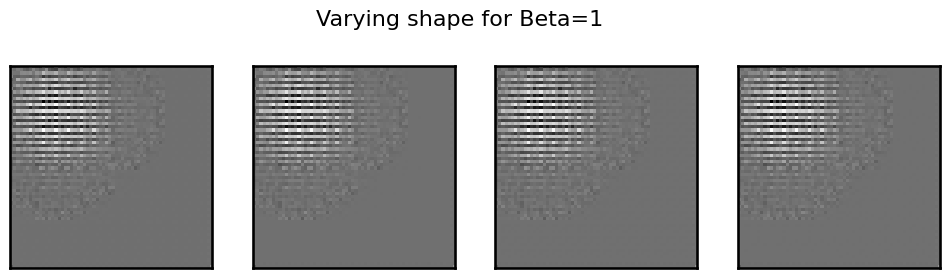

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


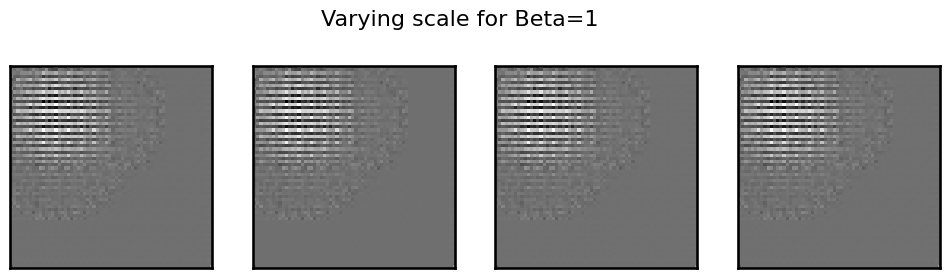

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


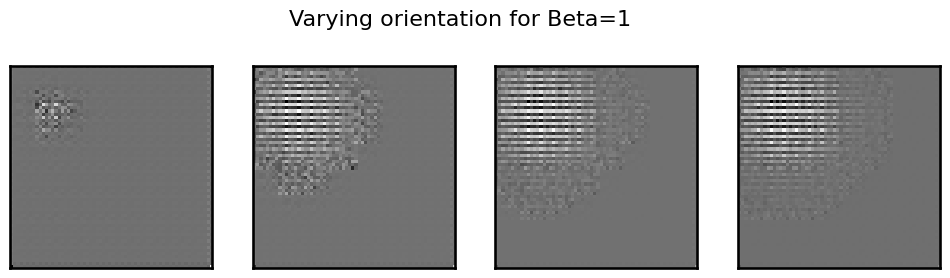

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


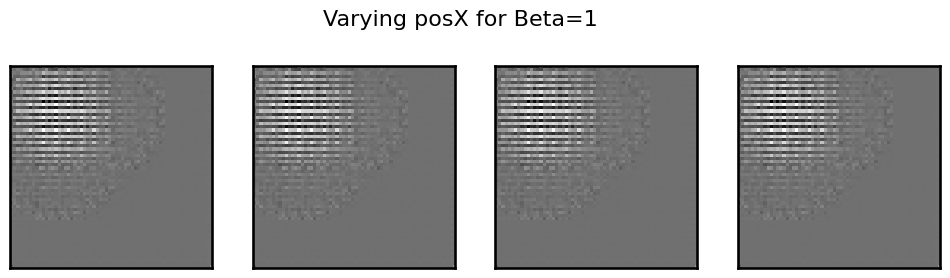

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


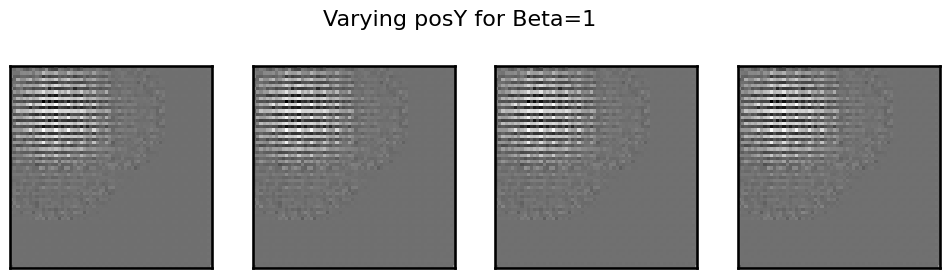

MIG SCORE  0.053125657461212984
-------------------------------------------------------->BETA = 3


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.0009892375164781697


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 2.9574329261095045e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


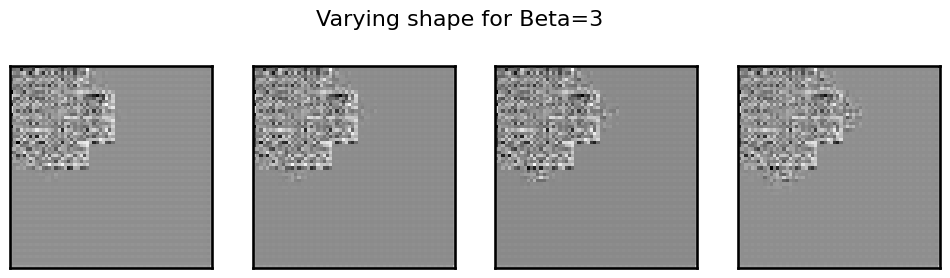

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


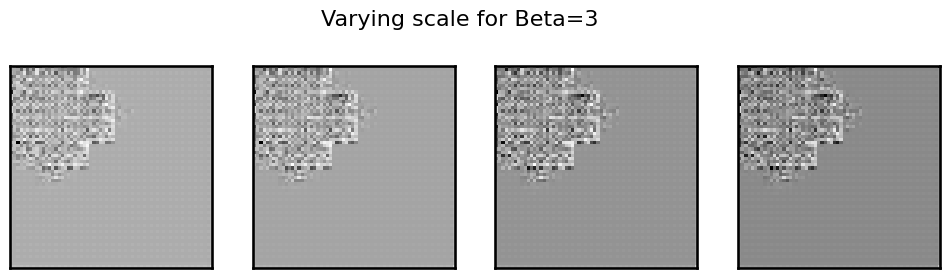

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


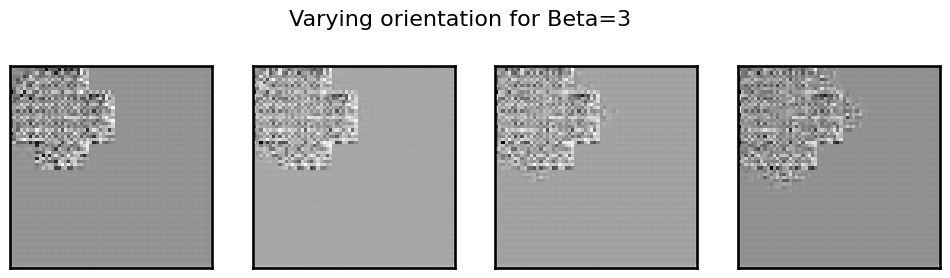

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


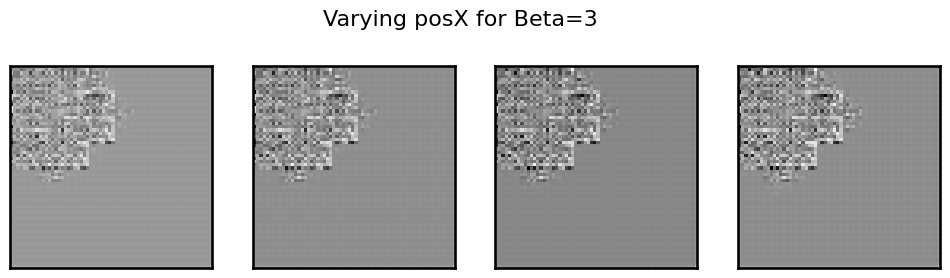

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


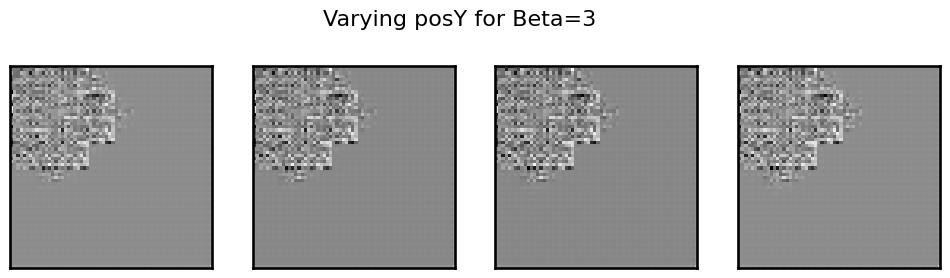

MIG SCORE  0.01850691584204429
-------------------------------------------------------->BETA = 5


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 6.894771695442614e-05


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 3.385563650226686e-05
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


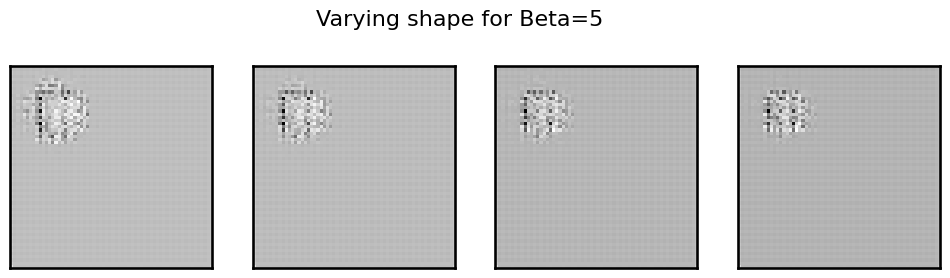

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


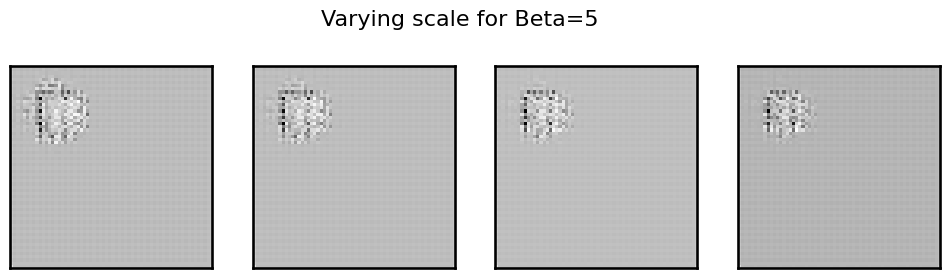

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


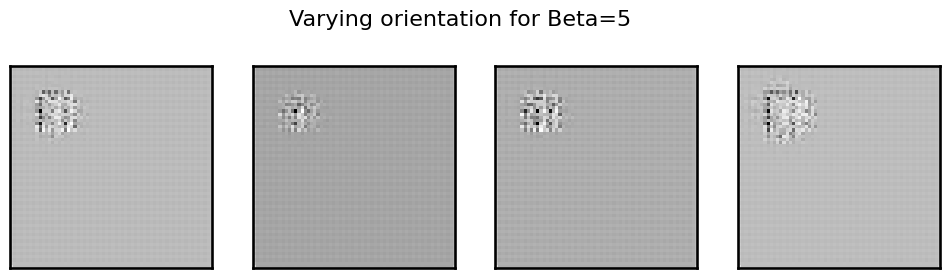

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


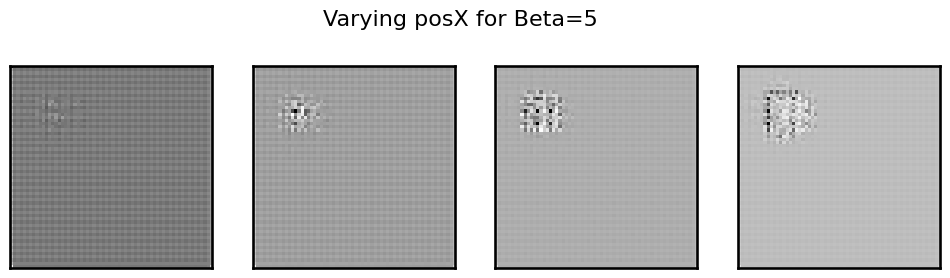

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


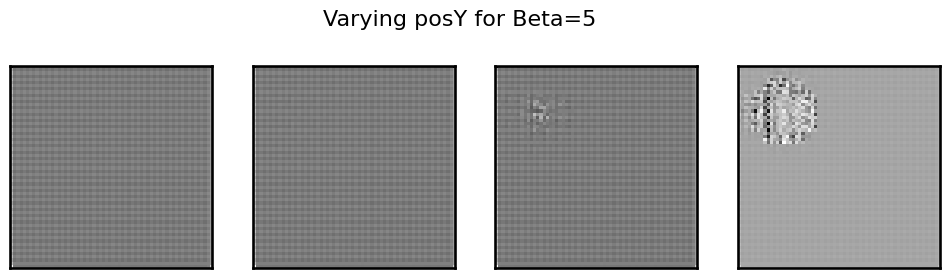

MIG SCORE  0.03768841431431933
-------------------------------------------------------->BETA = 7


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.000217956270716968


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 2.6656355345267002e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


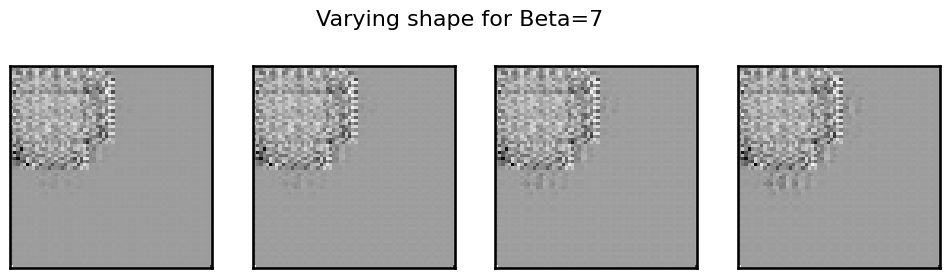

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


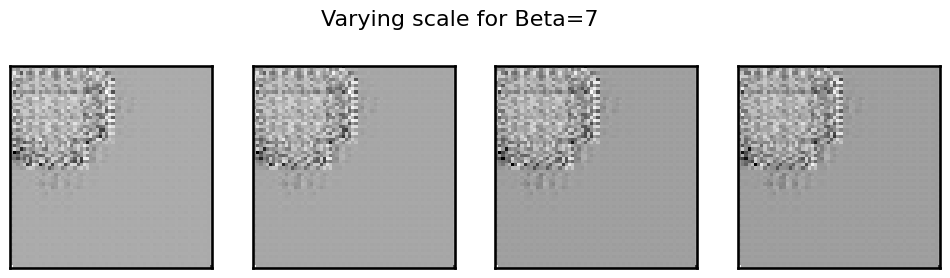

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


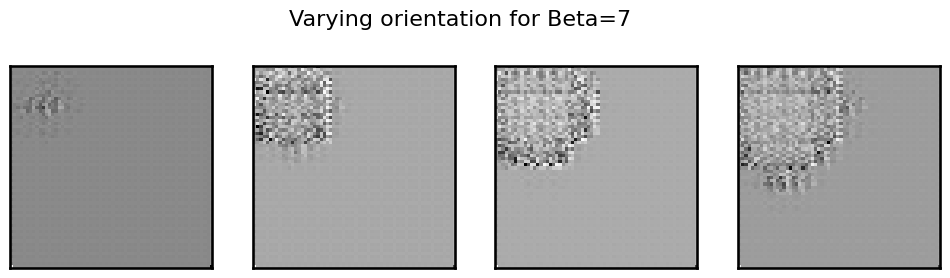

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


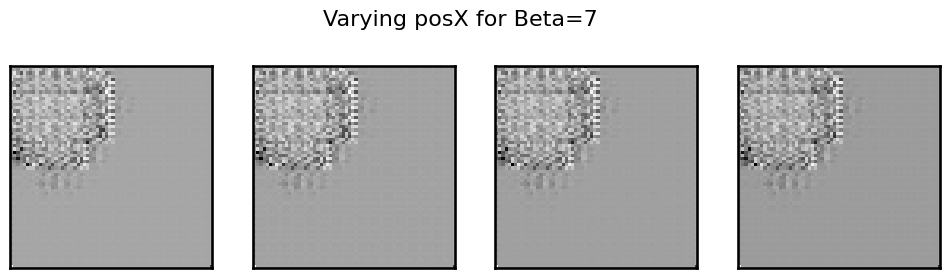

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


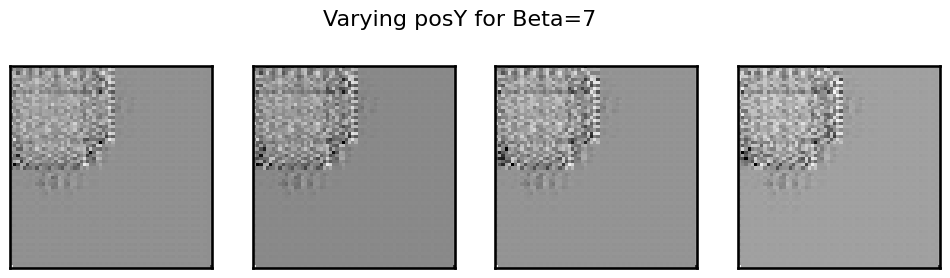

MIG SCORE  0.03951761448359488
-------------------------------------------------------->BETA = 9


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.0015695829861215316


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 2.6053139237092182e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


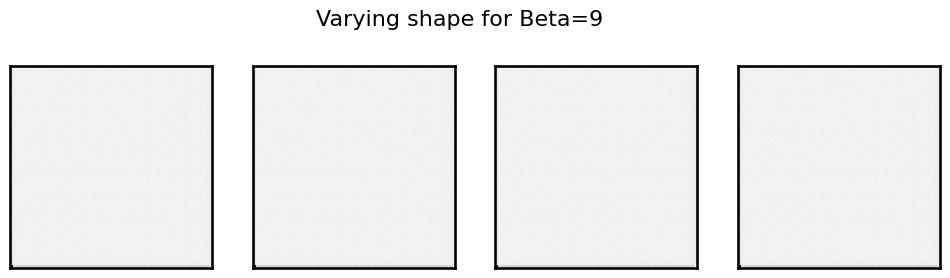

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


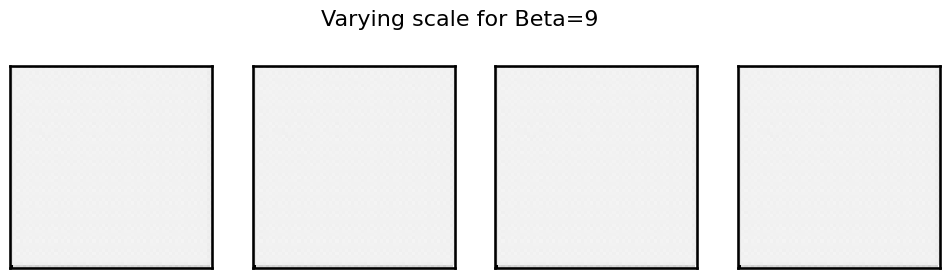

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


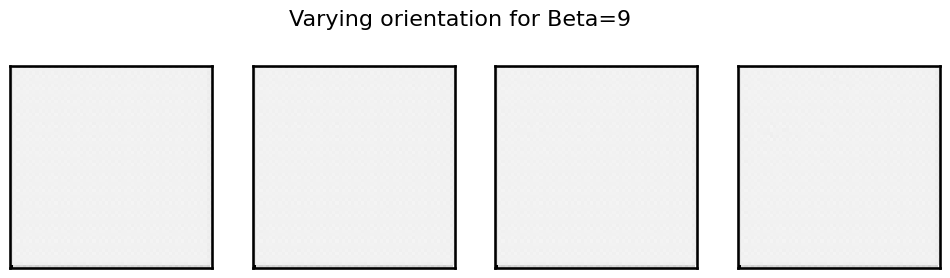

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


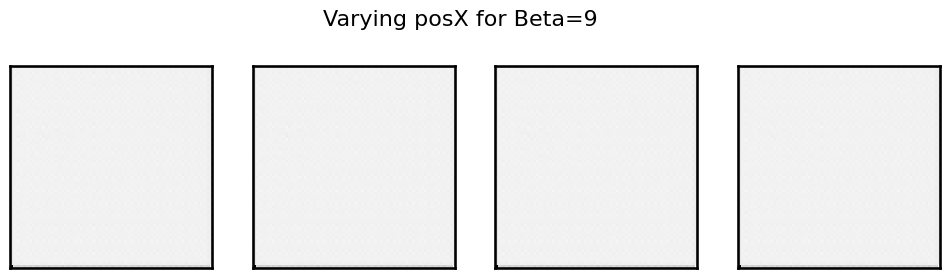

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


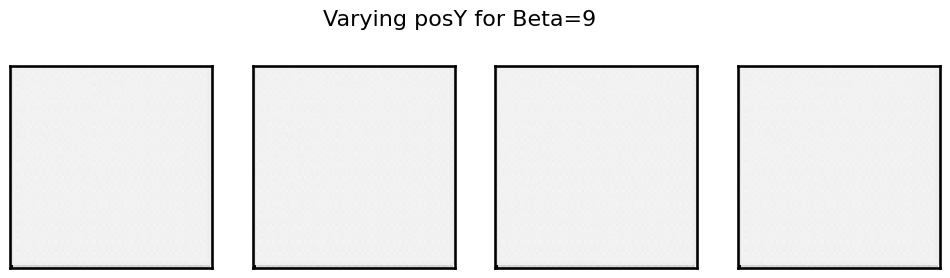

MIG SCORE  0.03344043290594123
-------------------------------------------------------->BETA = 11


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.0009458843451284338


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 3.0788398817094276e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


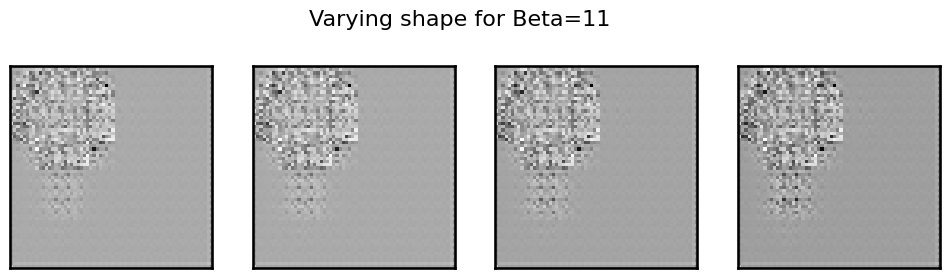

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


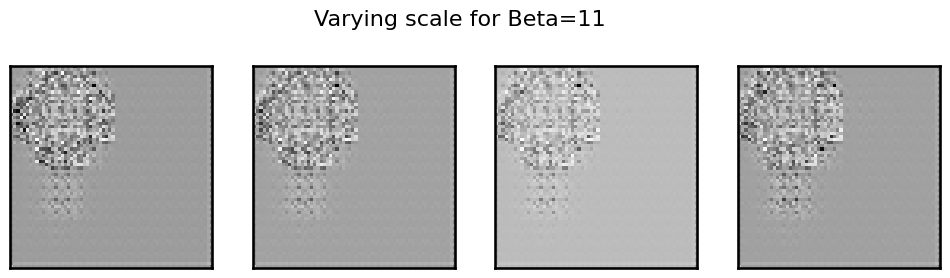

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


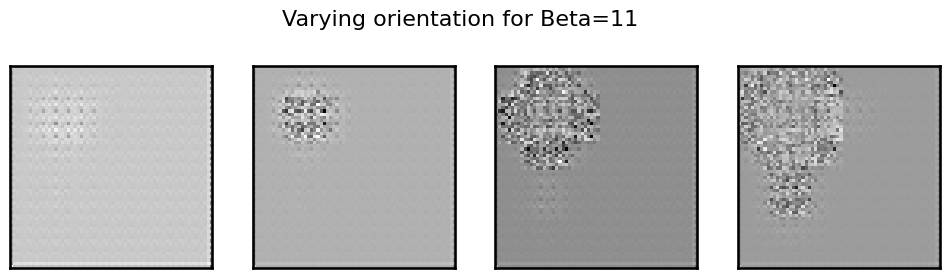

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


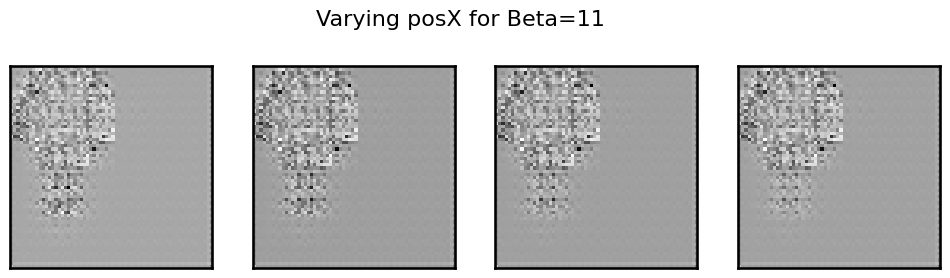

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


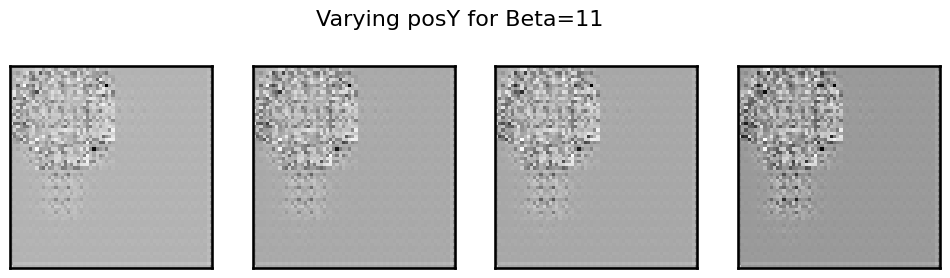

MIG SCORE  0.038741682342230896
-------------------------------------------------------->BETA = 13


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 8.865376628364174e-06


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 3.0765140195399e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


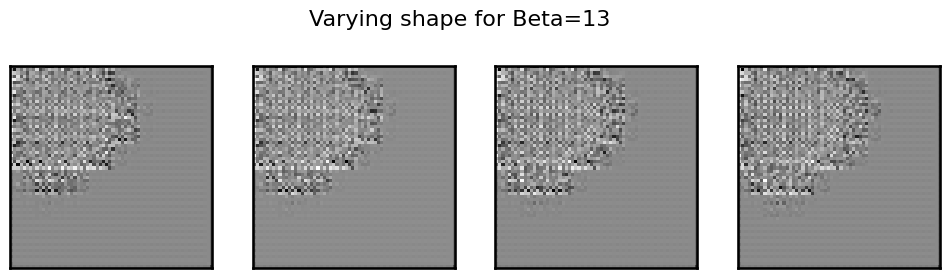

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


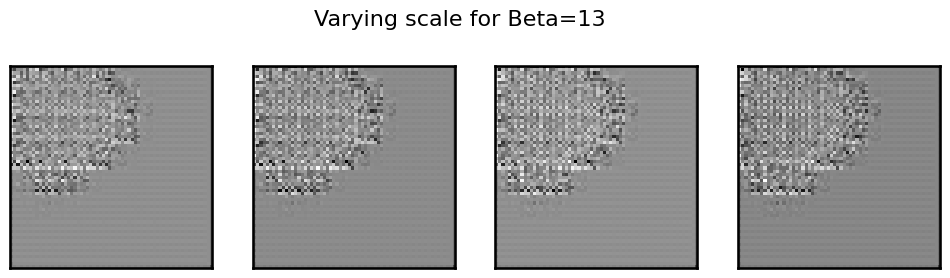

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


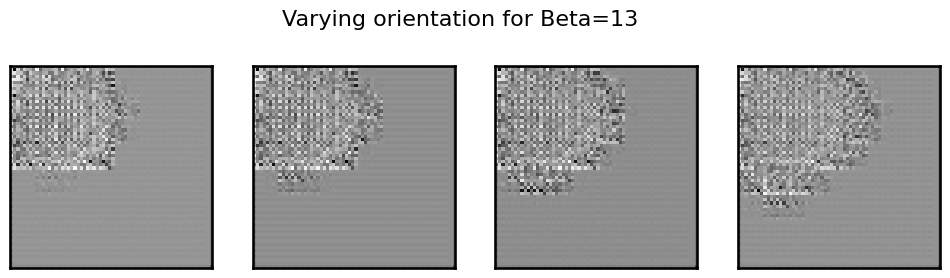

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


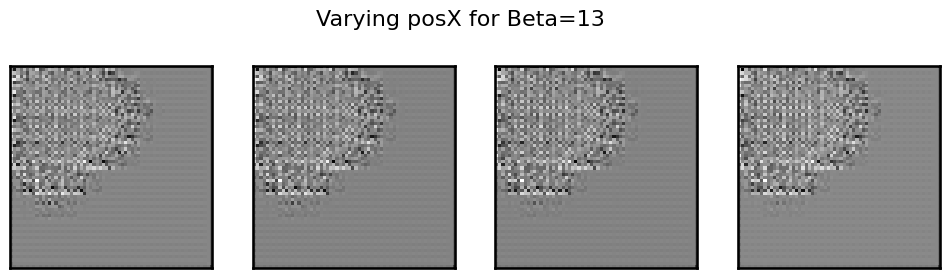

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


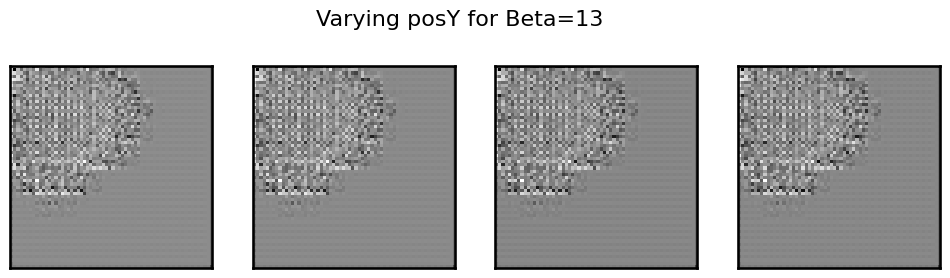

MIG SCORE  0.05314933563978306
-------------------------------------------------------->BETA = 15


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.00044289986726653297


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 3.6560751794922908e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


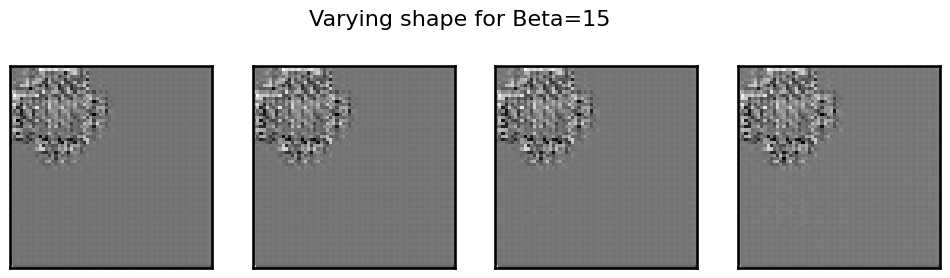

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


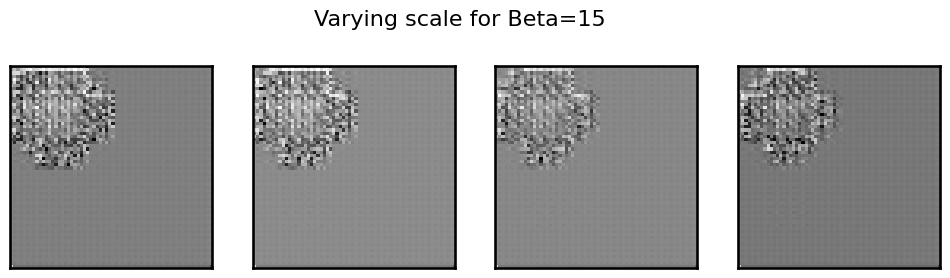

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


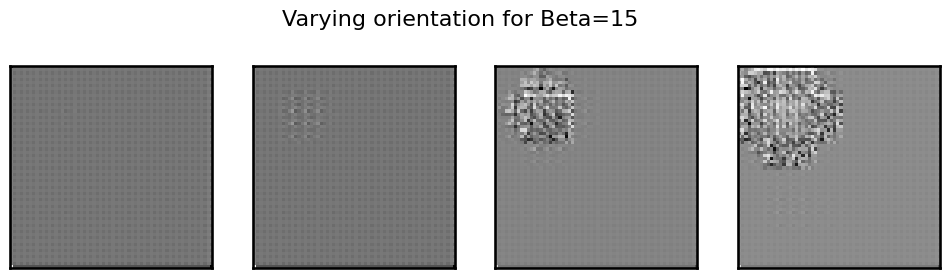

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


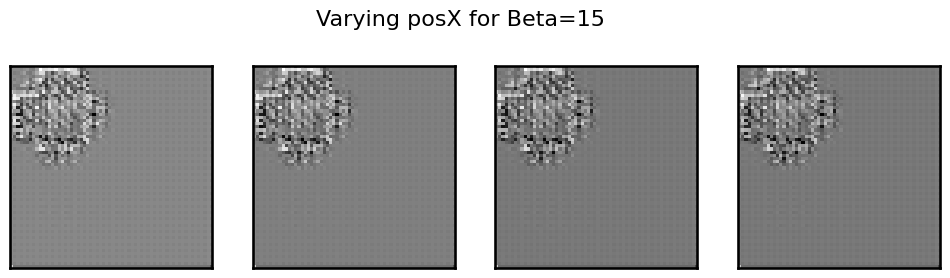

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


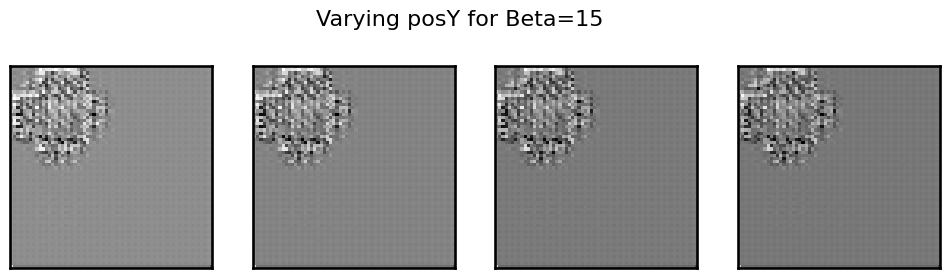

MIG SCORE  0.018015467948228458
-------------------------------------------------------->BETA = 17


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 4.4821738583777915e-05


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 2.731981794568128e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


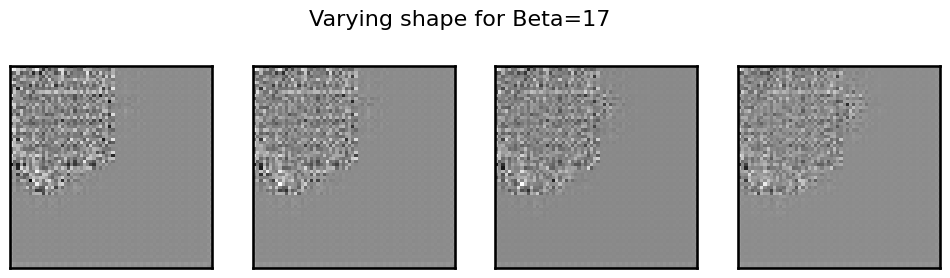

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


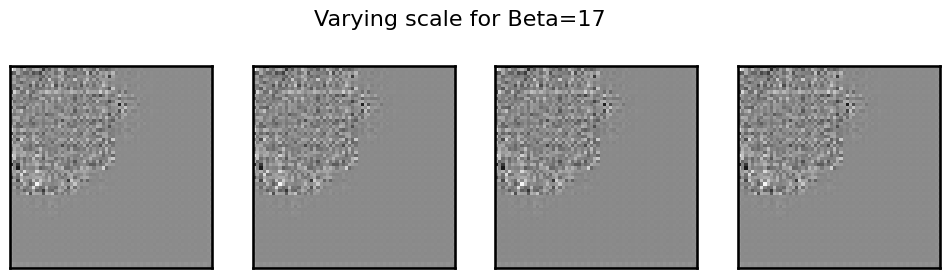

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


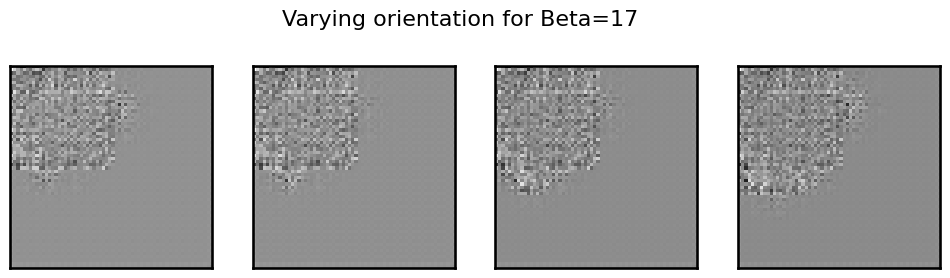

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


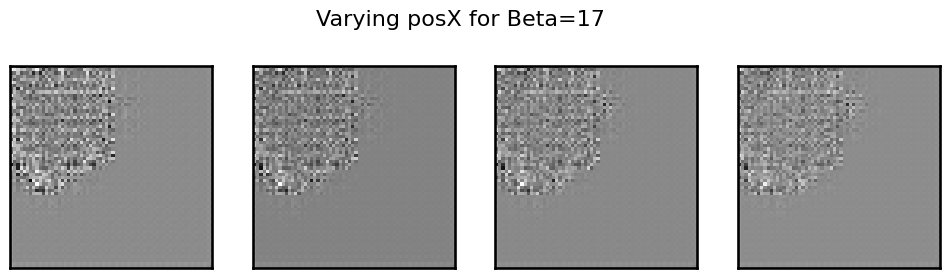

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


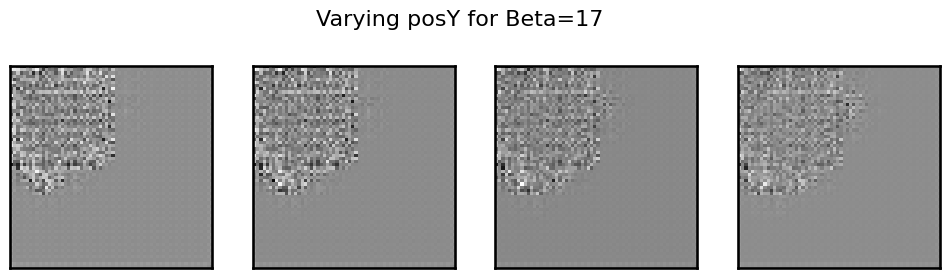

MIG SCORE  0.016963433808224293
-------------------------------------------------------->BETA = 19


INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params | Mode 
------------------------------------------
0 | model | BetaVAE | 3.2 M  | train
------------------------------------------
3.2 M     Trainable params
0         Non-trainable params
3.2 M     Total params
12.747    Total estimated model params size (MB)
48        Modules in train mode
0         Modules in eval mode


RECONSTRUCTION LOSS BEFORE TRAINING 0.001912104089569766


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=10` reached.


RECONSTRUCTION LOSS AFTER TRAINING 4.907132421294591e-06
generated  latent shape with range (1.0, 3.0)
generated  latent scale with range (0.5, 1.0)
generated  latent orientation with range (0.0, 6.283185307179586)
generated  latent posX with range (0.0, 1.0)
generated  latent posY with range (0.0, 1.0)
Visualizing Latent Dimension: 1 which is shape ranges from (1.0, 3.0) 


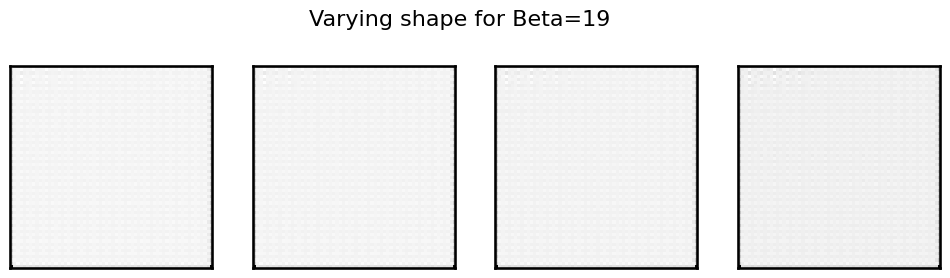

Visualizing Latent Dimension: 2 which is scale ranges from (0.5, 1.0) 


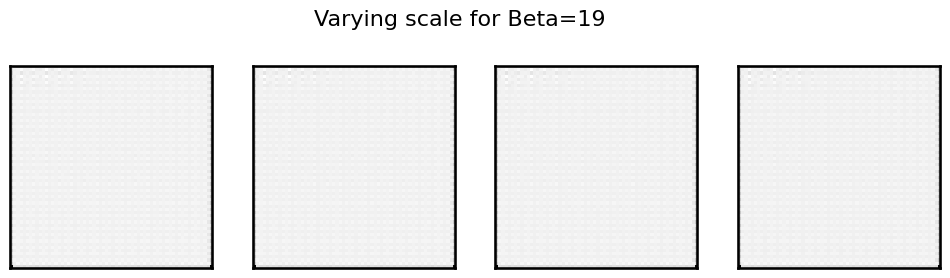

Visualizing Latent Dimension: 3 which is orientation ranges from (0.0, 6.283185307179586) 


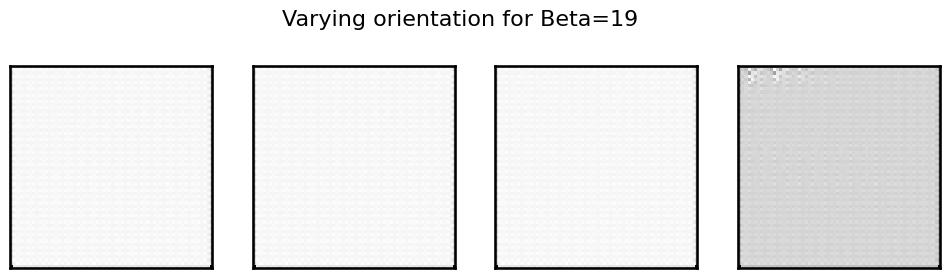

Visualizing Latent Dimension: 4 which is posX ranges from (0.0, 1.0) 


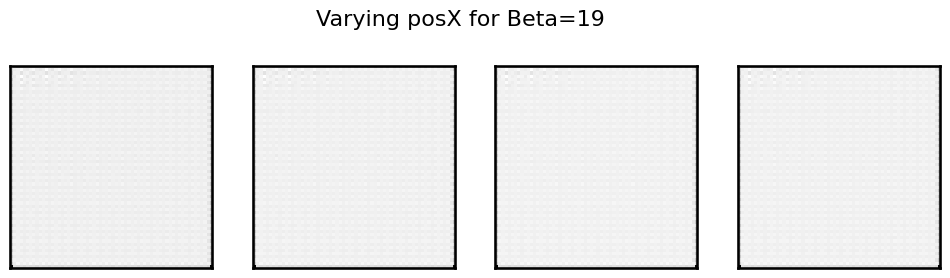

Visualizing Latent Dimension: 5 which is posY ranges from (0.0, 1.0) 


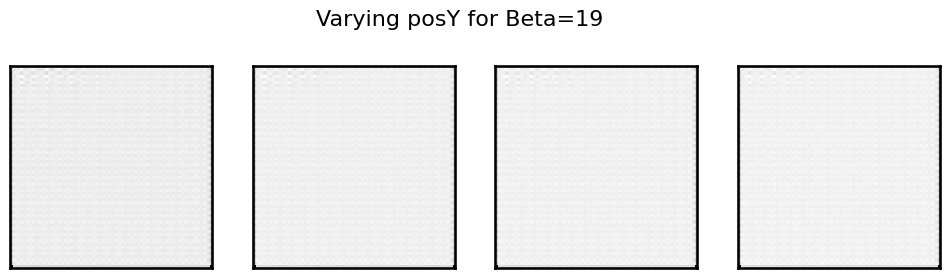

MIG SCORE  0.023712934324271285


In [37]:


exp_params = {
    "LR": 0.005,
    "weight_decay": 0.0,
    "scheduler_gamma": 0.95,
    "kld_weight": 0.00025,
    "manual_seed": 1265
}

recon_losses = []
mig_scores = []
beta_vals = [1,3,5,7,9,11,13,15,17,19]
for b in beta_vals:
  print("-------------------------------------------------------->BETA =",b)
  model = BetaVAE(loss_type='H',beta=b)
  recon_loss_pre = evaluate_model(model, test_dataloader)
  print("RECONSTRUCTION LOSS BEFORE TRAINING",recon_loss_pre)
  model.train()
  experiment = VAEXperiment(model,exp_params)

  data = VAEDataset(sprites_train_set, sprites_val_set,  batch_size=64 , pin_memory=True)
  data.setup()


  runner = pl.Trainer(max_epochs=10)
  runner.fit(experiment, datamodule=data)

  recon_loss_post = evaluate_model(model, test_dataloader)
  print("RECONSTRUCTION LOSS AFTER TRAINING",recon_loss_post)

  recon_losses.append((recon_loss_pre,recon_loss_post))

  latent_vectors_array = generate_latent_vectors(latent_size,list(range(latent_size))  , latent_ranges, fixed_latent_values)

  # Disentanglement test after training
  disentanglement_test(model, latent_vectors_array, list(range(latent_size)), latent_ranges, fixed_latent_values, b)

  mig_score = compute_mig(model, test_dataloader.dataset, device, num_samples=5000)
  print("MIG SCORE ",mig_score)

  mig_scores.append(mig_score)


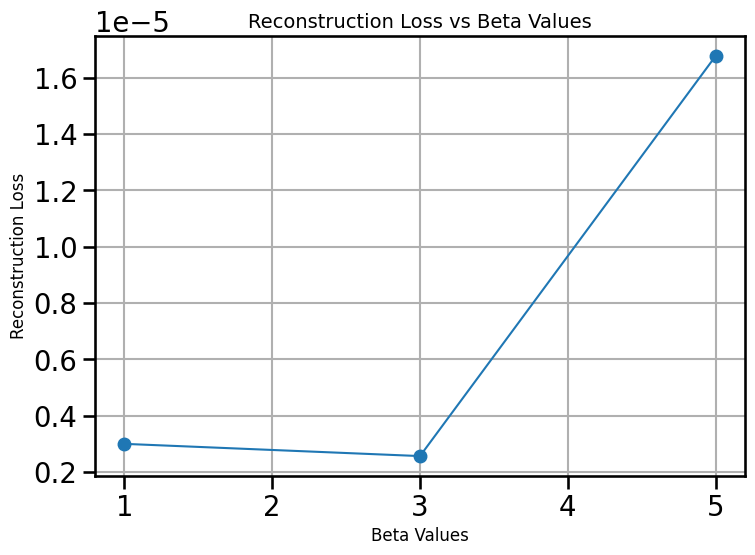

In [33]:
# recon_loss_pre = [x[0] for x in recon_losses]
recon_loss_post = [x[1] for x in recon_losses]

# Plotting
plt.figure(figsize=(8, 6))
beta_valz = beta_vals[:3]
recons = recon_loss_post[:3]
plt.plot(beta_valz, recons, label='Reconstruction Loss (Post)', marker='o', linestyle='-')
plt.xlabel('Beta Values', fontsize=12)
plt.ylabel('Reconstruction Loss', fontsize=12)
plt.title('Reconstruction Loss vs Beta Values', fontsize=14)
# plt.legend(fontsize=6)
plt.grid(True)
plt.tight_layout()
plt.show()

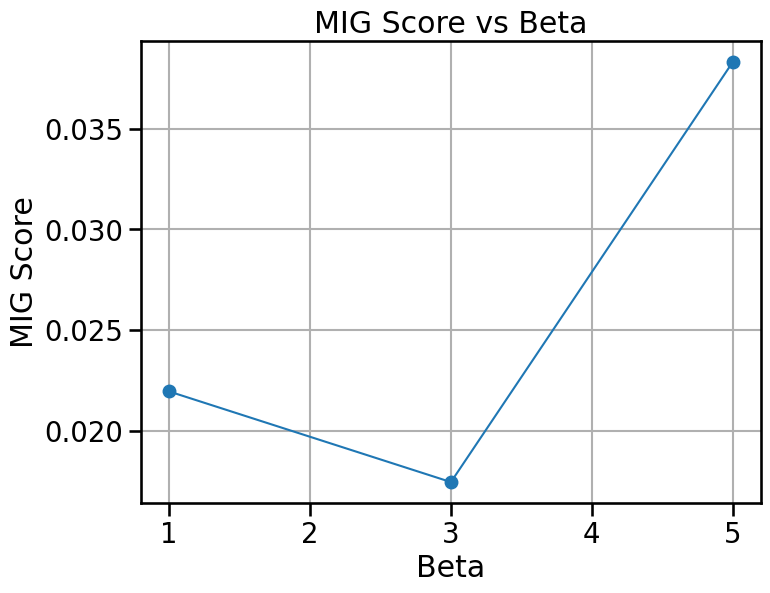

In [34]:
plt.figure(figsize=(8, 6))
mig_vals = mig_scores[:3]
beta_valz = beta_vals[:3]
plt.plot(beta_valz, mig_vals, marker='o', linestyle='-')
plt.xlabel('Beta')
plt.ylabel('MIG Score')
plt.title('MIG Score vs Beta')
plt.grid(True)
plt.xticks([1,2,3,4,5])
plt.show()

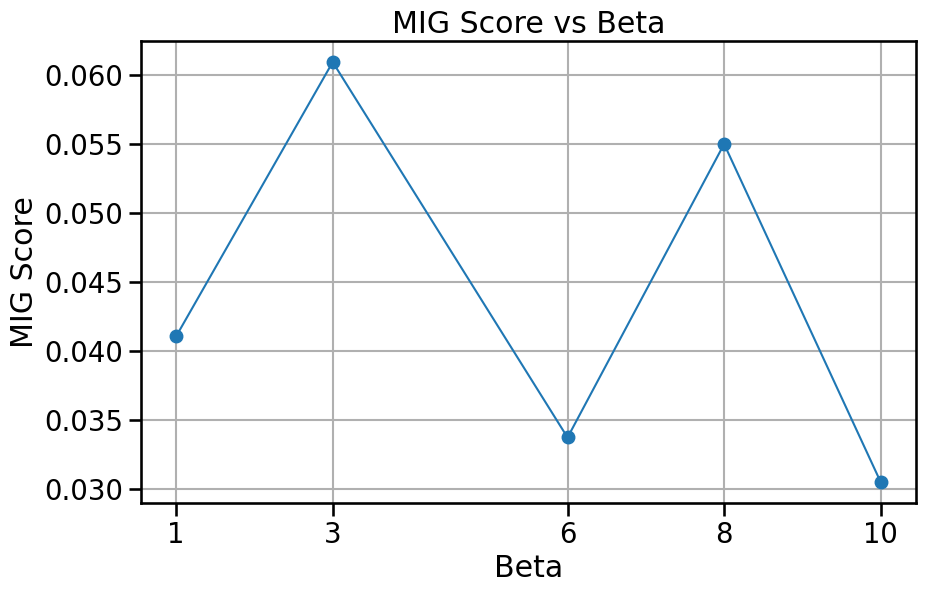

In [78]:
plt.figure(figsize=(10, 6))
# beta_vals = [1,3,6,8,10]
mig_vals = mig_scores[:5]
plt.plot(beta_vals, mig_vals, marker='o', linestyle='-')
plt.xlabel('Beta')
plt.ylabel('MIG Score')
plt.title('MIG Score vs Beta')
plt.grid(True)
plt.xticks(beta_vals)
plt.show()

In [60]:
# import shutil
# shutil.rmtree('/content/lightning_logs')

In [ ]:
# model_params:
#   name: 'BetaVAE'
#   in_channels: 3
#   latent_dim: 128
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@      EITHER (BetaVAE)
#   loss_type: 'B'
#   gamma: 10.0 / beta: 10.0
#   max_capacity: 25
#   Capacity_max_iter: 10000
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@         OR   (Disentangled Beta VAE)
#   loss_type: 'H'
# @@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@         END


# exp_params:
#   LR: 0.005
#   weight_decay: 0.0
#   scheduler_gamma: 0.95
#   kld_weight: 0.00025
#   manual_seed: 1265

# trainer_params:
#   gpus: [1]
#   max_epochs: 10